# Experiments on NME

Import libraries

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate as interp
import collections
import math
import copy
sys.path.insert(0, '../ReSurfEMG')
import helper_functions as hf
from config import Config


In [2]:
# get new changes in our library i.e. the tmsisdk
import sys
sys.path.insert(0, '../resurfemg')

from tmsisdk_lite import Poly5Reader

# Set a collection place for experiments

Below change the path to the root directory where you are keeping your EMGs and ventilator "Draeger" files

# Reruns should be done from this cell as the start

In [3]:
y_axis = widgets.Dropdown(
    options=["Samples", "Seconds"],
    value='Seconds',
    description="Select View Option",
    disabled=False,
)
display(y_axis)

Dropdown(description='Select View Option', index=1, options=('Samples', 'Seconds'), value='Seconds')

In [4]:
time_view = y_axis.value
time_view

'Seconds'

<a id='#patient_select'>Input patient file path</a>

In [5]:
config = Config()
root_emg_directory = config.get_directory('root_emg_directory')

Now you can pick a file from the list, which have been numbered.

In [6]:
emg_pattern = os.path.join(root_emg_directory, '**/*.Poly5')
emg_and_draeger_files = glob.glob(emg_pattern, recursive=True)

emg_files = []
draeger_files = []

for file in emg_and_draeger_files:
    if 'Draeger' in file:
        draeger_files.append(file)
    else:
        emg_files.append(file)
list_of_numbers_strung = []

for i in range(len(emg_files)):
    list_of_numbers_strung.append(str(i))


btn = widgets.Dropdown(
    options=list_of_numbers_strung,
    value='0',
    description='Picked File:',
    disabled=False,
)
display(btn)

Dropdown(description='Picked File:', options=('0', '1', '2'), value='0')

In [7]:
number_chosen = int(btn.value)
emg_file_chosen = emg_files[number_chosen]
draeger_file_chosen = draeger_files[number_chosen]
print("The files you chose are:\n", emg_file_chosen, '\n', draeger_file_chosen)

The files you chose are:
 data\EMG_recording (2).Poly5 
 data\Draeger_recording (2).Poly5


In [8]:
# get the poly5 reading
data_emg = Poly5Reader(emg_file_chosen)
data_draeger = Poly5Reader(draeger_file_chosen)
data_emg_samples = data_emg.samples[:data_emg.num_samples]
emg_sample_rate = data_emg.sample_rate
data_draeger_samples = data_draeger.samples[:data_draeger.num_samples]
draeger_sample_rate = data_draeger.sample_rate


Reading file  data\EMG_recording (2).Poly5
	 Number of samples:  648144 
	 Number of channels:  3 
	 Sample rate: 2048 Hz
Done reading data.
Reading file  data\Draeger_recording (2).Poly5
	 Number of samples:  31639 
	 Number of channels:  3 
	 Sample rate: 100 Hz
Done reading data.


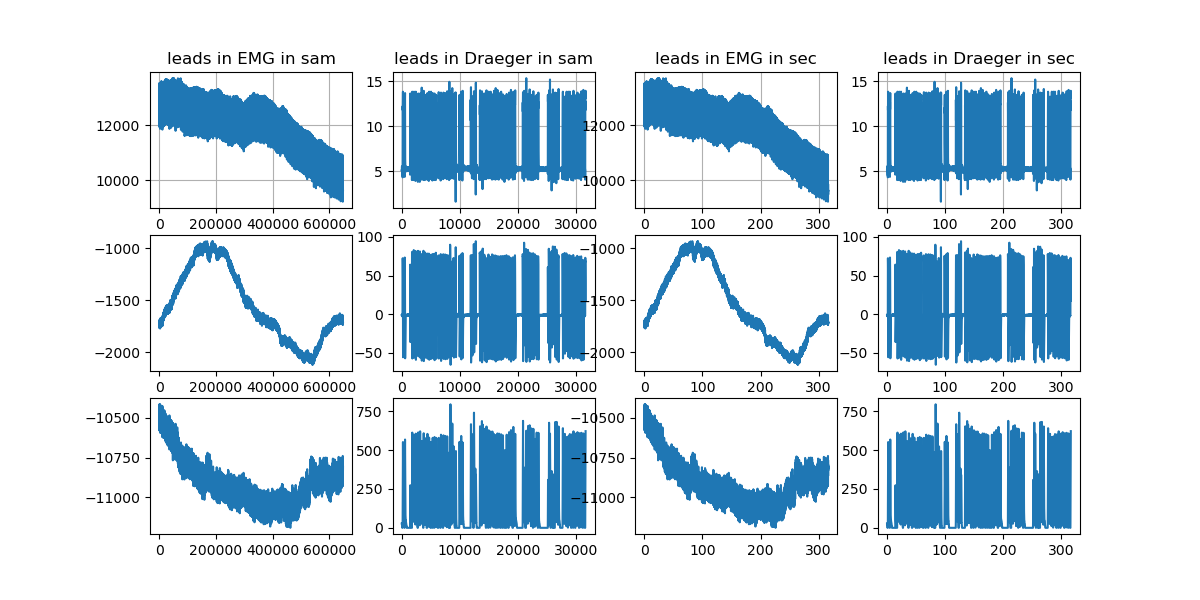

In [9]:
x_emg = copy.deepcopy(data_emg_samples)
x_draeger = copy.deepcopy(data_draeger_samples)

y_emg = [i/emg_sample_rate for i in range(len(data_emg_samples[0]))]
y_draeger = [i/draeger_sample_rate for i in range(len(data_draeger_samples[0]))]

fig, axis = plt.subplots(nrows=3, ncols=4, figsize=(12, 6))
axis[0, 0].grid(True)
axis[0, 0].plot(x_emg[0])
axis[0, 0].set(title='leads in EMG in sam')
axis[1, 0].plot(x_emg[1])
axis[2, 0].plot(x_emg[2])

axis[0, 1].set(title='leads in Draeger in sam')
axis[0, 1].grid(True)
axis[0, 1].plot(x_draeger[0])
axis[1, 1].plot(x_draeger[1])
axis[2, 1].plot(x_draeger[2])

axis[0, 2].grid(True)
axis[0, 2].plot(y_emg, x_emg[0])
axis[0, 2].set(title='leads in EMG in sec')
axis[1, 2].plot(y_emg, x_emg[1])
axis[2, 2].plot(y_emg, x_emg[2])

axis[0, 3].set(title='leads in Draeger in sec')
axis[0, 3].grid(True)
axis[0, 3].plot(y_draeger, x_draeger[0])
axis[1, 3].plot(y_draeger, x_draeger[1])
axis[2, 3].plot(y_draeger, x_draeger[2])


In [10]:
# type in start number and press return for it to update
start = input()

In [11]:
# type in end number and press return for it to update
end = input()

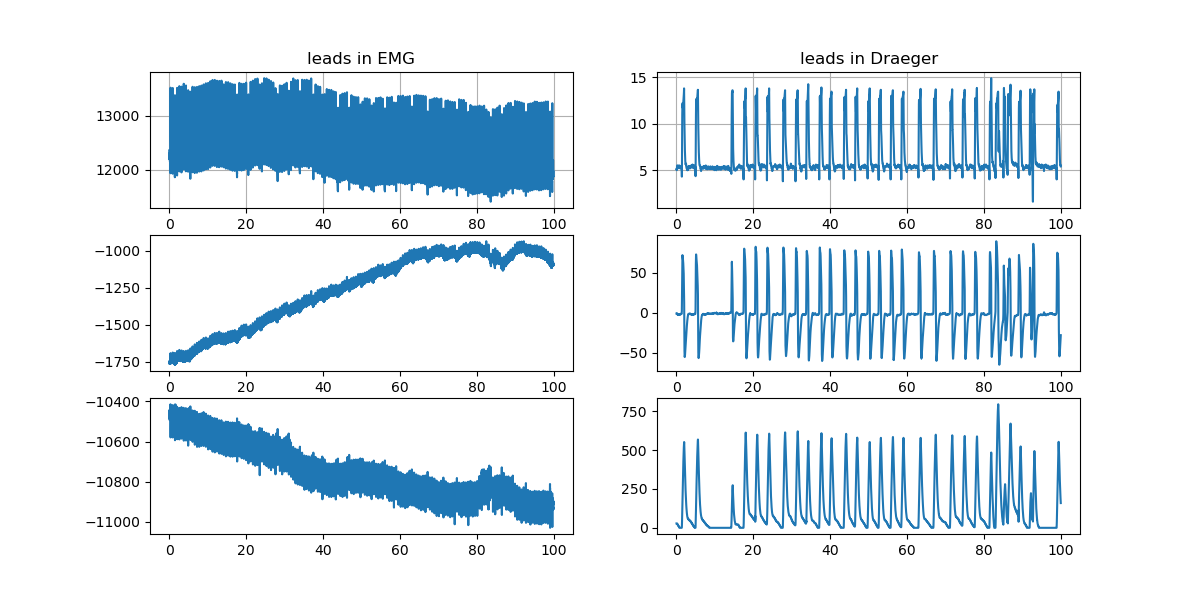

In [12]:
if time_view == 'Seconds':
    start_s = int(float(start)* emg_sample_rate)
    end_s = min([int(float(end)*emg_sample_rate), len(data_emg_samples[0])-1])
    start_draeger_s = int(float(start)* draeger_sample_rate)
    end_draeger_s = min([int(float(end)* draeger_sample_rate), len(data_draeger_samples[0])-1])

else:
    start_s = int(float(start))
    end_s = min([int(float(end)), len(data_emg_samples[0])-1])
    start_draeger_s = int(float(start)* draeger_sample_rate/emg_sample_rate)
    end_draeger_s = min([int(float(start)* draeger_sample_rate/emg_sample_rate), len(data_draeger_samples[0])-1])
    y_emg = [range(len(data_emg_samples[0]))]
    y_draeger = [range(len(data_draeger_samples[0]))]

# nox examine at a certain scale- from point a to b as samples
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 6))
axis[0, 0].grid(True)
axis[0, 0].plot(y_emg[int(start_s):int(end_s)], x_emg[0][int(start_s):int(end_s)])
axis[0, 0].set(title='leads in EMG')
axis[1, 0].plot(y_emg[int(start_s):int(end_s)], x_emg[1][int(start_s):int(end_s)])
axis[2, 0].plot(y_emg[int(start_s):int(end_s)], x_emg[2][int(start_s):int(end_s)])
axis[0, 1].set(title='leads in Draeger')
axis[0, 1].grid(True)
axis[0, 1].plot(y_draeger[int(start_draeger_s):int(end_draeger_s)], x_draeger[0][int(start_draeger_s):int(end_draeger_s)])
axis[1, 1].plot(y_draeger[int(start_draeger_s):int(end_draeger_s)], x_draeger[1][int(start_draeger_s):int(end_draeger_s)])
axis[2, 1].plot(y_draeger[int(start_draeger_s):int(end_draeger_s)], x_draeger[2][int(start_draeger_s):int(end_draeger_s)])

Happy with your selection? If not redo, then we can see how the filter works on it.

# Pre-processing pipeline

In [13]:
# processed_data_emg_di = working_pipeline_pre_entropy(data_emg_samples)
bd_filtered_file_data = hf.emg_bandpass_butter_sample(data_emg_samples, 1, 500, 2048, output='sos')
processed_data_ecg = bd_filtered_file_data[0, start_s:end_s]
processed_data_emg_di = bd_filtered_file_data[1, start_s:end_s]
processed_data_emg_para = bd_filtered_file_data[2, start_s:end_s]

x_draeger = x_draeger[:, start_draeger_s:end_draeger_s]

y_emg = [i/emg_sample_rate for i in range(len(data_emg_samples[0]))]
y_draeger = [i/draeger_sample_rate for i in range(len(data_draeger_samples[0]))]

y_emg = y_emg[start_s:end_s]
y_draeger = y_draeger[start_draeger_s:end_draeger_s]

In [14]:
plot_window = 5

# Detect ECG peaks on 1Hz high-pass filtered signals
peak_width = 0.001
peak_fraction = 0.40

ecg = processed_data_ecg
ecg_rms = hf.full_rolling_rms(ecg, 10)
peak_height = peak_fraction*(max(ecg_rms[0:int(plot_window*emg_sample_rate)]) - min(ecg_rms[0:int(plot_window*emg_sample_rate)]))

ECG_peaks, properties  = scipy.signal.find_peaks(ecg_rms, height=peak_height, width=peak_width*emg_sample_rate)
ECG_peaks = ECG_peaks - 5

# Filter EXG signals 20Hz high pass
ECG_h20 = hf.emg_bandpass_butter_sample(ecg, 20, 500, 2048, output='sos')
emg_di_h20 = hf.emg_bandpass_butter_sample(processed_data_emg_di, 20, 500, 2048, output='sos')

# Gate ECG and EMG signal
gate_width = 0.1
gate_fill_method = 3    # 0: Zeros, 1: Interpolate start-end, 2: Average prior data, 3: Moving average
gate_width_samples = int(gate_width*emg_sample_rate)

ECG_gated = hf.gating(ECG_h20, ECG_peaks, gate_width=gate_width_samples, method=gate_fill_method)
emg_di_gated = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=gate_fill_method)

# Example of all methods
emg_di_gated_zero = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=0)
emg_di_gated_interpolate = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=1)
emg_di_gated_prior_ave = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=2)
emg_di_gated_MA = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=3) # Default


Plot gated signal

Text(0.5, 0, 't (s)')

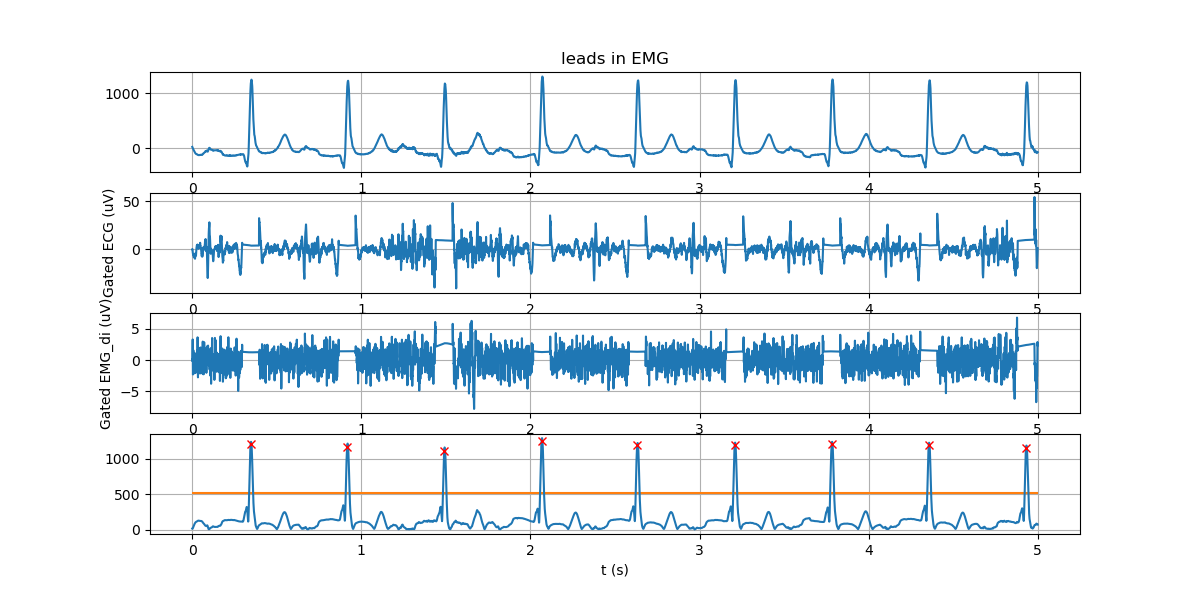

In [15]:

fig, axis = plt.subplots(nrows=4, ncols=1, figsize=(12, 6))
axis[0].grid(True)
axis[0].plot(y_emg[0:int(+plot_window*2048)], bd_filtered_file_data[0, int(start_s):int(start_s+plot_window*2048)])
axis[1].set_ylabel('Source ECG (uV)')

axis[0].set(title='leads in EMG')
axis[1].grid(True)
axis[1].plot(y_emg[0:int(plot_window*2048)], ECG_gated[0:int(plot_window*2048)])
axis[1].set_ylabel('Gated ECG (uV)')
# axis[1].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], ECG_gated_RMS[int(start_s):int(start_s+plot_window*2048)])
axis[2].grid(True)
axis[2].plot(y_emg[0:int(plot_window*2048)], emg_di_gated[0:int(plot_window*2048)])
# axis[2].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], emg_gated_RMS[int(start_s):int(start_s+plot_window*2048)])
axis[2].set_ylabel('Gated EMG_di (uV)')

axis[3].grid(True)
axis[3].plot(y_emg[0:int(plot_window*2048)], ecg_rms[0:int(plot_window*2048)])
axis[3].hlines(y=peak_height, xmin=y_emg[0], xmax=y_emg[int(plot_window*2048)], color = "C1")
for idx in range(len(ECG_peaks)):
    if (ECG_peaks[idx] > int(0)) & (ECG_peaks[idx] < int(plot_window*2048)):
        axis[3].plot(y_emg[ECG_peaks[idx]], ecg_rms[ECG_peaks[idx]],'rx')

axis[3].set_xlabel('t (s)')

Calculate RMS

In [16]:
RMS_window_ms = 200
RMS_windows_samp = int(RMS_window_ms / 1000 *  emg_sample_rate)

RMS_data_emg_di = hf.full_rolling_rms(emg_di_gated, RMS_windows_samp)

RMS_data_emg_di_zero = hf.full_rolling_rms(emg_di_gated_zero, RMS_windows_samp)
RMS_data_emg_di_interpolate = hf.full_rolling_rms(emg_di_gated_interpolate, RMS_windows_samp)
RMS_data_emg_di_prior_ave = hf.full_rolling_rms(emg_di_gated_prior_ave, RMS_windows_samp)
RMS_data_emg_di_MA = hf.full_rolling_rms(emg_di_gated_MA, RMS_windows_samp)

Plot RMS signals

Text(0, 0.5, 'P_vent (cmH2O)')

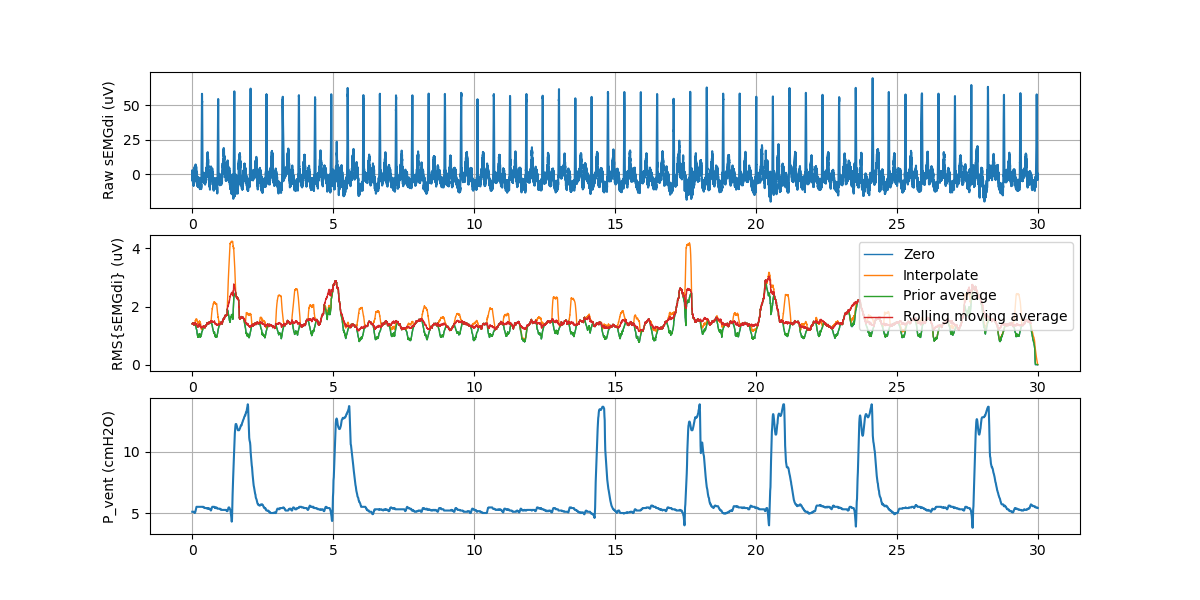

In [17]:
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(12, 6))
axis[0].grid(True)
axis[0].plot(y_emg, processed_data_emg_di)
axis[0].set_ylabel('Raw sEMGdi (uV)')

axis[1].plot(y_emg, RMS_data_emg_di_zero, linewidth=1)
axis[1].plot(y_emg, RMS_data_emg_di_interpolate, linewidth=1)
axis[1].plot(y_emg, RMS_data_emg_di_prior_ave, linewidth=1)
axis[1].plot(y_emg, RMS_data_emg_di_MA, linewidth=1)
axis[1].set_xlabel('t (s)')
axis[1].set_ylabel('RMS{sEMGdi} (uV)')
axis[1].legend(['Zero', 'Interpolate', 'Prior average', 'Rolling moving average'])

axis[-1].grid(True)
axis[-1].plot(y_draeger, x_draeger[0])
axis[-1].set_ylabel('P_vent (cmH2O)')